In [23]:
from tensorflow import keras
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [24]:
#Training and Validation
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [25]:
#Getting Images
training_data = train.flow_from_directory('data/training/', target_size=(200,200), 
                                          batch_size=3, class_mode='categorical')

validation_data = validation.flow_from_directory('data/validation/', target_size=(200,200), 
                                                 batch_size=3, class_mode='categorical')

Found 200 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [26]:
training_data.class_indices

{'burj_khalifa': 0,
 'christ_the_reedemer': 1,
 'pyramids_of_giza': 2,
 'roman_colosseum': 3,
 'taj_mahal': 4}

In [31]:
# CNN Model
output_classes = 5
model = keras.Sequential(
    [
         keras.Input(shape=(200, 200, 3)),  # Adjust input shape according to your dataset
         keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
         keras.layers.MaxPooling2D(pool_size=(2, 2)),
         keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
         keras.layers.MaxPooling2D(pool_size=(2, 2)),
         keras.layers.Flatten(),
         keras.layers.Dense(256, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(output_classes, activation="softmax")  # Use softmax for multi-class classification
    ]
)

In [32]:
# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(training_data,
          epochs=10,
          validation_data=validation_data)

Epoch 1/10
67/67 [==============================] - 47s 653ms/step - loss: 2.2465 - accuracy: 0.3450 - val_loss: 1.3314 - val_accuracy: 0.4800
Epoch 2/10
67/67 [==============================] - 42s 631ms/step - loss: 1.1910 - accuracy: 0.5550 - val_loss: 1.1529 - val_accuracy: 0.5440
Epoch 3/10
67/67 [==============================] - 41s 614ms/step - loss: 0.7825 - accuracy: 0.6850 - val_loss: 0.8842 - val_accuracy: 0.7040
Epoch 4/10
67/67 [==============================] - 42s 631ms/step - loss: 0.4966 - accuracy: 0.8300 - val_loss: 1.1126 - val_accuracy: 0.6400
Epoch 5/10
67/67 [==============================] - 42s 630ms/step - loss: 0.3122 - accuracy: 0.9050 - val_loss: 0.7528 - val_accuracy: 0.7760
Epoch 6/10
67/67 [==============================] - 43s 643ms/step - loss: 0.2482 - accuracy: 0.9200 - val_loss: 0.8183 - val_accuracy: 0.7520
Epoch 7/10
67/67 [==============================] - 42s 628ms/step - loss: 0.1591 - accuracy: 0.9550 - val_loss: 0.8182 - val_accuracy: 0.8240

In [35]:
model.save("wow_model.h5")

C:\Users\jared\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


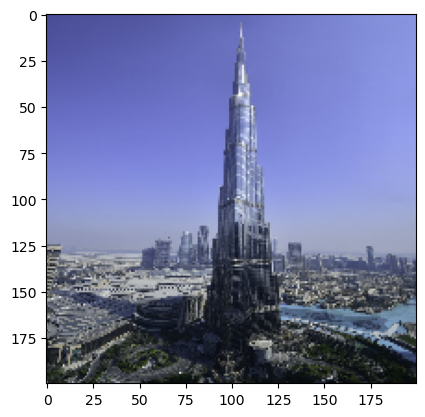

1/1 [==============================] - 0s 271ms/step
Burj Khalifa


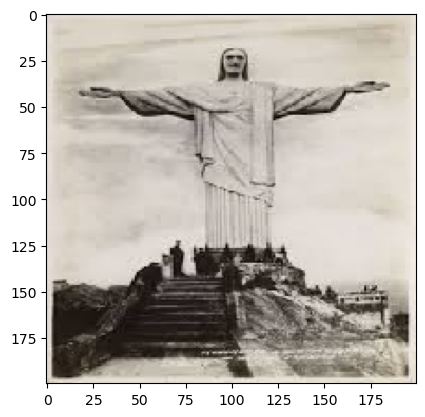

1/1 [==============================] - 0s 99ms/step
Christ the Redeemer


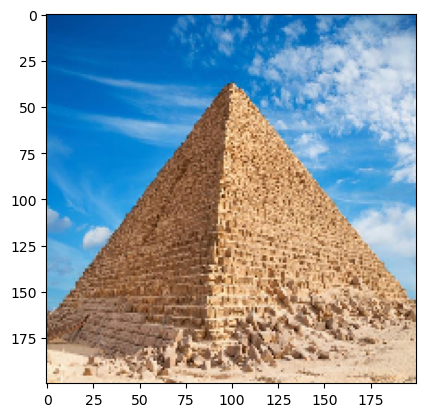

1/1 [==============================] - 0s 113ms/step
Pyramids of Giza


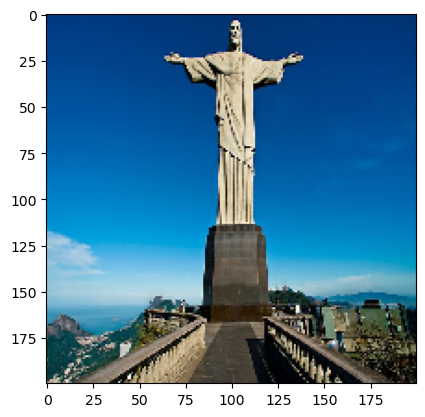

1/1 [==============================] - 0s 84ms/step
Burj Khalifa


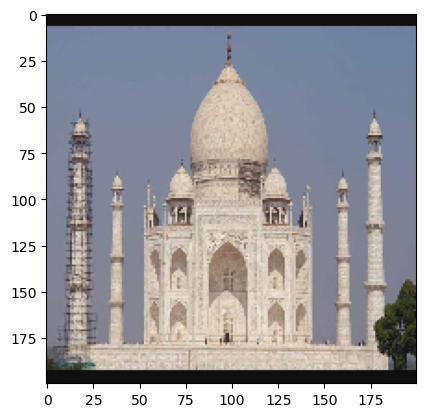

1/1 [==============================] - 0s 83ms/step
Taj Mahal


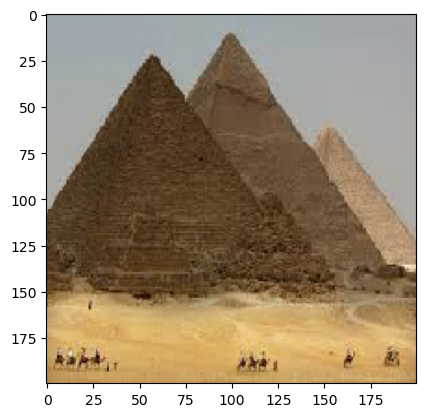

1/1 [==============================] - 0s 71ms/step
Pyramids of Giza


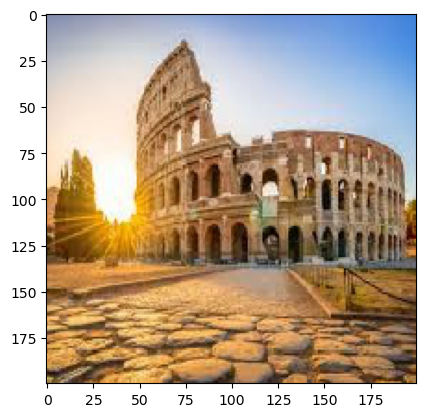

1/1 [==============================] - 0s 72ms/step
Roman Colosseum


In [34]:
#testing data
test_data = 'data/testing'

for pic in os.listdir(test_data):
    data = image.load_img(test_data+'//'+pic,target_size=(200,200))
    plt.imshow(data)
    plt.show()
    
    img_arrays = image.img_to_array(data)
    img_arrays = np.expand_dims(img_arrays,axis=0)
    images = np.vstack([img_arrays])
    value = model.predict(images)
    predicted_class_index = np.argmax(value)
    predicted_class = predicted_class_index + 1


    #classifying each eval
    if predicted_class == 1:
        print("Burj Khalifa")
    elif predicted_class == 2:
        print("Christ the Redeemer")
    elif predicted_class == 3:
        print("Pyramids of Giza")
    elif predicted_class == 4:
        print("Roman Colosseum")
    elif predicted_class == 5:
        print("Taj Mahal")
    else:
        print("could not discern image")
    